## c_r_k (2r+1) coefficient calculation in julia


In [56]:
using Pkg

Pkg.add("Polynomials")

function c_values(n)
    values = zeros(0)
    matrix = zeros((n,n))

    for i in 1:n
        for j in 1:n
                matrix[i,j] = ((i)^(2*(j)))/(factorial(2*(j)))
        end
    end

    inverted_matrix = inv(matrix)
    right_matrix = zeros(Float64, (n,2*n+1))
    for i in 1:n
            right_matrix[i,n+1] = -2
            right_matrix[i, (n+i+1)] = 1
            right_matrix[i, (n-i+1)] = 1
    end
    final_matrix = *(inverted_matrix,right_matrix)/2

    k = collect(0:1:n)
    for l in k
        append!(values,final_matrix[1,n+l+1])
        
    end
    return round.(values, digits=5)
    
end



c_values(2)

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


3-element Array{Float64,1}:
 -2.5
  1.33333
 -0.08333

#### Pade's approximant

In [3]:
using LinearAlgebra, Polynomials,Plots
function fact(p)
    if p == 1
        return p
    elseif p == 0
        return 1
    else
        return p*fact(p-1)
    end
        
end

function Pade_approximant(order)
    T_x = [1/fact(i) for i in 0:2*order]
    #print(T_x)
    mat = zeros(order,order)
    for i in 0:order-1
        for j in 0:order-1
            mat[i+1,j+1] = T_x[2*order-j-i]

        end

    end
    mat
    inv_mat = inv(mat)

    col = [-1*T_x[2*order-b+1] for b in 0:order-1]
    Y= similar(col)
    mul!(Y,inv_mat,col)
    Y

    full_b_col = zeros(order+1,1)
    for t in 1:order+1
        if t == 1
            full_b_col[t] = 1
        else
            full_b_col[t] = Y[t-1]
        end

    end

    print(full_b_col)
    print(col)

    c_matrix_a = zeros(order+1,order+1)
    for u in 1:order+1
        for v in 1:order+1
            if u >= v
                c_matrix_a[u,v] = T_x[u-v+1]
            end
        end
    end
    c_matrix_a
    full_b_col
    a_col = similar(full_b_col)
    mul!(a_col,c_matrix_a,full_b_col)
    print(a_col)
    cols = [a_col[order-t+2] for t in 1:order+1]
    round.(roots(Polynomial(reverse(cols))),digits=5)
end

Pade_approximant(4)

[1.0; -0.5; 0.10714285714285854; -0.011904761904762307; 0.000595238095238107][-2.48015873015873e-5, -0.0001984126984126984, -0.001388888888888889, -0.008333333333333333][1.0; 0.5; 0.10714285714285854; 0.01190476190476289; 0.0005952380952384054]

4-element Array{Complex{Float64},1}:
 -5.79242 - 1.73447im
 -5.79242 + 1.73447im
 -4.20758 - 5.31484im
 -4.20758 + 5.31484im

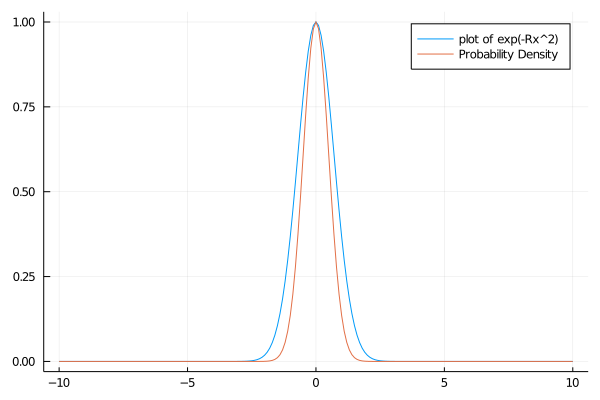

In [4]:
R = 1
f(x,R) = exp(-R*x*x)
Pd(x,R) = (exp(-R*x*x))^2
x = collect(-10:0.1:10)
fy = f.(x,R)
plot(x,fy,label="plot of exp(-Rx^2)")
plot!(x,Pd.(x,R),label="Probability Density")
# find the way to label axis

1.1195151349202477

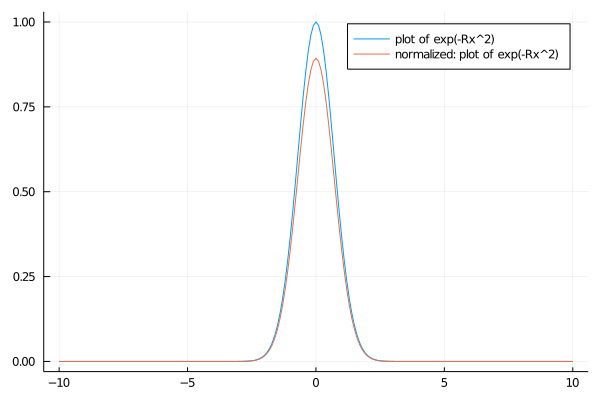

In [5]:
#Integrating the function using simposon's 1/3 rule
h = 0.1
sum = 0
for i in 1:length(x)
    
    if i == 1 || i == length(x)
        sum += Pd.(x[i],R)
        
    elseif mod(i,2) == 0
        sum += 2*Pd.(x[i],R)
        
    else
        sum += 4*Pd.(x[i],R)
        
    end
end
sum = (h/3)*sum
print(sqrt(sum))
f_norm = f.(x,R)/sqrt(sum)
plot(x,fy,label="plot of exp(-Rx^2)")
plot!(x,f_norm,label="normalized: plot of exp(-Rx^2)")

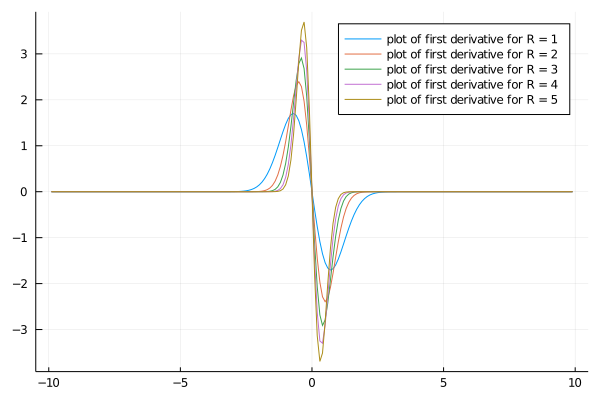

In [6]:
## First derivative using finite difference
plot()
function first_derivative(f_x_ph,f_x_mh, h)
    return (f_x_ph - f_x_mh)/h
end
u = collect(-9.9:0.1:9.9)
for R in 1:5
    #R = 2
    h = 0.1
    j = collect(-10:0.1:10)
    x = zeros(0)

    for k in 2:length(j)-1
        p = j[k+1]
        m = j[k-1]
        f_x_ph = f.(p,R)
        f_x_mh = f.(m,R)
        fd = first_derivative(f_x_ph,f_x_mh,h)
        append!(x,fd)
        #println(first_derivative(f_x_ph,f_x_mh,h))
        #plot(i,fd,label="plot")
    end
    
    global plt = plot!(u,x,label="plot of first derivative for R = "*string(R))
    HoldTheOldPlot = deepcopy(plt)
end
#println(x)
#
#plot(u,x,label="plot of first derivative for R = "*string(R))

#plot!(u,x,label="plot of first derivative for R = "*string(R))
display(plt)    



## Double differentiation using c_k

In [7]:
c_k = [-0.0833,1.3333,-2.5,1.3333,-0.0833]

5-element Array{Float64,1}:
 -0.0833
  1.3333
 -2.5
  1.3333
 -0.0833

In [63]:



c_k = [-0.0833, 1.3333, -2.5, 1.3333, -0.0833]

#psi_dd = Float64[]  # create an empty array to hold the results
x = collect(-3.2:0.1:3.2)
psi_dd = Float64[]
psi_val = [Pd.(x,1) for x in -3:0.1:3]
push!(psi_val,0)
push!(psi_val,0)
pushfirst!(psi_val,0)
pushfirst!(psi_val,0)
for (ind, i) in enumerate(psi_val)
    sum1 = 0.0
    for j = -(length(c_k)-3):length(c_k)-3
        if 3 <= ind <= length(psi_val)-2
            sum1 += c_k[3+j]*psi_val[ind+j]
        end
    end
    push!(psi_dd, sum1)
end
length(psi_dd)

length(x)


65

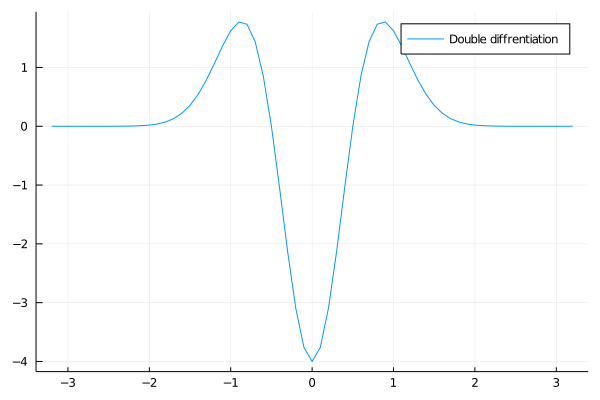

In [65]:
plot()
plot(x, psi_dd/0.01,label="Double diffrentiation")